In [1]:
! apt-get install default-jre
!java -version
! pip install h2o
import h2o
h2o.init()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
openjdk version "11.0.5" 2019-10-15
OpenJDK Runtime Environment (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04)
OpenJDK 64-Bit Server VM (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04, mixed mode, sharing)
     |████████████████████████████████| 123.4MB 98kB/s 
  Created wheel for h2o: filename=h2o-3.28.0.1-py2.py3-none-any.whl size=123410554 sha256=5cdaaf4ba9161ed37c3e397cc957d7000152f86e1db9ad65fc66b11dfb5c31e7
  Stored in directory: /root/.cache/pip/wheels/ff/82/f4/3fe9c895b93c53b25ae44dc44aa54dad571c711f48bc485fe9
Successfully built h2o
Checking whether there is an H2O instance running at h

H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.1
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_unknownUser_5cy961
H2O cluster total nodes:,1
H2O cluster free memory:,2.938 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [2]:
import matplotlib.pyplot as plt
url =  "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"
data = h2o.import_file(url)

train,valid,test=data.split_frame([0.8,0.1],seed=69)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
print("%d/%d/%d" %(train.nrows,valid.nrows,test.nrows))

35255/4272/4451


In [0]:
y='IsArrDelayed' # binomial Classification
ignoreFields=['ArrDelay',
 'DepDelay','CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay','IsArrDelayed',
 'IsDepDelayed','ActualElapsedTime']

xAll=[i for i in train.names if i not in ignoreFields]

In [6]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator as dle

m_def= dle() #Baseline model
%time m_def.train(xAll,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.53 s, sys: 139 ms, total: 1.67 s
Wall time: 5min 32s


In [7]:
m_def.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.1121889273361314
RMSE: 0.3349461558760324
LogLoss: 0.34216888833941556
Mean Per-Class Error: 0.15034622048616453
AUC: 0.9313784229897785
AUCPR: 0.8023880560240342
Gini: 0.8627568459795569

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26749132113053586: 


,,NO,YES,Error,Rate
0,NO,1466.0,484.0,0.2482,(484.0/1950.0)
1,YES,207.0,2294.0,0.0828,(207.0/2501.0)
2,Total,1673.0,2778.0,0.1552,(691.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.267491,0.869104,270.0
1,max f2,0.135323,0.916516,325.0
2,max f0point5,0.581037,0.880936,156.0
3,max accuracy,0.417318,0.847675,211.0
4,max precision,0.999921,1.000000,0.0
5,max recall,0.011016,1.000000,388.0
6,max specificity,0.999921,1.000000,0.0
7,max absolute_mcc,0.417318,0.694965,211.0
8,max min_per_class_accuracy,0.389279,0.845128,221.0
9,max mean_per_class_accuracy,0.417318,0.849654,211.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 50.60 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010110,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.017993,77.968812,77.968812
1,,2,0.020220,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.035986,77.968812,77.968812
2,,3,0.030106,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.053579,77.968812,77.968812
3,,4,0.040216,0.999996,1.779688,1.779688,1.000000,0.999998,1.000000,0.999999,0.017993,0.071571,77.968812,77.968812
4,,5,0.050101,0.999981,1.779688,1.779688,1.000000,0.999989,1.000000,0.999997,0.017593,0.089164,77.968812,77.968812
5,,6,0.100202,0.999075,1.779688,1.779688,1.000000,0.999688,1.000000,0.999843,0.089164,0.178329,77.968812,77.968812
6,,7,0.150079,0.993037,1.779688,1.779688,1.000000,0.996594,1.000000,0.998763,0.088764,0.267093,77.968812,77.968812
7,,8,0.200180,0.974525,1.771707,1.777691,0.995516,0.985008,0.998878,0.995321,0.088764,0.355858,77.170746,77.769072
8,,9,0.300157,0.878849,1.683705,1.746386,0.946067,0.935219,0.981287,0.975302,0.168333,0.524190,68.370494,74.638558
9,,10,0.400135,0.673451,1.479741,1.679762,0.831461,0.782278,0.943852,0.927073,0.147941,0.672131,47.974069,67.976178


In [8]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1576814077353_4


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,202 weights/biases, 9.2 MB, 352,995 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.545897,0.474943,0,0.000117368,0.0255046,-0.350987,0.29514
2,,3,200,Rectifier,0,0,0,0.282704,0.346322,0,-0.0066894,0.0867894,0.0028629,0.294382
3,,4,2,Softmax,,0,0,0.0208816,0.0546994,0,-0.0153557,0.292032,0.0157908,0.19375




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.09308230025940428
RMSE: 0.30509392039076144
LogLoss: 0.28987067847060294
Mean Per-Class Error: 0.12330589711497741
AUC: 0.9523710712704737
AUCPR: 0.7910499449926506
Gini: 0.9047421425409474

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34264002820306244: 


,,NO,YES,Error,Rate
0,NO,3818.0,700.0,0.1549,(700.0/4518.0)
1,YES,550.0,5010.0,0.0989,(550.0/5560.0)
2,Total,4368.0,5710.0,0.124,(1250.0/10078.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.342640,0.889086,242.0
1,max f2,0.169126,0.928784,309.0
2,max f0point5,0.565758,0.906416,167.0
3,max accuracy,0.359154,0.876563,235.0
4,max precision,0.999895,1.000000,0.0
5,max recall,0.020383,1.000000,382.0
6,max specificity,0.999895,1.000000,0.0
7,max absolute_mcc,0.396484,0.750638,221.0
8,max min_per_class_accuracy,0.391184,0.875360,223.0
9,max mean_per_class_accuracy,0.411997,0.876694,215.0



Gains/Lift Table: Avg response rate: 55.17 %, avg score: 50.73 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010022,1.000000,1.812590,1.812590,1.000000,1.000000,1.000000,1.000000,0.018165,0.018165,81.258993,81.258993
1,,2,0.020044,1.000000,1.812590,1.812590,1.000000,1.000000,1.000000,1.000000,0.018165,0.036331,81.258993,81.258993
2,,3,0.030065,1.000000,1.812590,1.812590,1.000000,1.000000,1.000000,1.000000,0.018165,0.054496,81.258993,81.258993
3,,4,0.040087,0.999996,1.812590,1.812590,1.000000,0.999998,1.000000,1.000000,0.018165,0.072662,81.258993,81.258993
4,,5,0.050010,0.999982,1.812590,1.812590,1.000000,0.999990,1.000000,0.999998,0.017986,0.090647,81.258993,81.258993
5,,6,0.100020,0.999109,1.812590,1.812590,1.000000,0.999722,1.000000,0.999860,0.090647,0.181295,81.258993,81.258993
6,,7,0.150030,0.993980,1.812590,1.812590,1.000000,0.997123,1.000000,0.998948,0.090647,0.271942,81.258993,81.258993
7,,8,0.200040,0.978527,1.812590,1.812590,1.000000,0.987269,1.000000,0.996028,0.090647,0.362590,81.258993,81.258993
8,,9,0.300060,0.895800,1.749653,1.791611,0.965278,0.944169,0.988426,0.978742,0.175000,0.537590,74.965278,79.161088
9,,10,0.399980,0.704511,1.594791,1.742443,0.879841,0.807424,0.961300,0.935944,0.159353,0.696942,59.479114,74.244256




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.11341347004284372
RMSE: 0.3367691643289862
LogLoss: 0.34802188657533134
Mean Per-Class Error: 0.15407239133459127
AUC: 0.9278082767141302
AUCPR: 0.7790639130296243
Gini: 0.8556165534282605

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3396736407904454: 


,,NO,YES,Error,Rate
0,NO,1581.0,352.0,0.1821,(352.0/1933.0)
1,YES,309.0,2030.0,0.1321,(309.0/2339.0)
2,Total,1890.0,2382.0,0.1547,(661.0/4272.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.339674,0.859987,236.0
1,max f2,0.125417,0.910254,329.0
2,max f0point5,0.534456,0.879008,169.0
3,max accuracy,0.361213,0.846676,227.0
4,max precision,0.999911,1.000000,0.0
5,max recall,0.013042,1.000000,388.0
6,max specificity,0.999911,1.000000,0.0
7,max absolute_mcc,0.361213,0.690883,227.0
8,max min_per_class_accuracy,0.381290,0.843950,220.0
9,max mean_per_class_accuracy,0.381290,0.845928,220.0



Gains/Lift Table: Avg response rate: 54.75 %, avg score: 50.02 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010066,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.018384,0.018384,82.642155,82.642155
1,,2,0.020131,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.018384,0.036768,82.642155,82.642155
2,,3,0.030197,1.000000,1.826422,1.826422,1.000000,1.000000,1.000000,1.000000,0.018384,0.055152,82.642155,82.642155
3,,4,0.040028,0.999996,1.826422,1.826422,1.000000,0.999998,1.000000,1.000000,0.017956,0.073108,82.642155,82.642155
4,,5,0.050094,0.999983,1.826422,1.826422,1.000000,0.999991,1.000000,0.999998,0.018384,0.091492,82.642155,82.642155
5,,6,0.100187,0.999103,1.826422,1.826422,1.000000,0.999716,1.000000,0.999857,0.091492,0.182984,82.642155,82.642155
6,,7,0.150047,0.993346,1.826422,1.826422,1.000000,0.996947,1.000000,0.998890,0.091065,0.274049,82.642155,82.642155
7,,8,0.200140,0.977188,1.817887,1.824285,0.995327,0.986519,0.998830,0.995794,0.091065,0.365113,81.788687,82.428538
8,,9,0.300094,0.881045,1.710934,1.786531,0.936768,0.938338,0.978159,0.976657,0.171013,0.536127,71.093353,78.653091
9,,10,0.400047,0.669364,1.518454,1.719551,0.831382,0.787220,0.941486,0.929325,0.151774,0.687901,51.845351,71.955077




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2019-12-20 03:56:11,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-12-20 03:56:12,10.434 sec,393 obs/sec,0.015175,1,535.0,0.497429,0.711157,-0.000438,0.646345,0.675061,1.81259,0.416352,0.505018,0.734065,-0.029469,0.628712,0.665062,1.826422,0.443586
2,,2019-12-20 03:57:37,1 min 35.705 sec,1152 obs/sec,2.551014,170,89936.0,0.375262,0.426675,0.430628,0.881238,0.839433,1.81259,0.217801,0.388666,0.457121,0.390249,0.862583,0.814428,1.826422,0.228933
3,,2019-12-20 03:59:03,3 min 1.093 sec,1217 obs/sec,5.366359,356,189191.0,0.323825,0.321784,0.576016,0.933764,0.842870,1.81259,0.164120,0.344868,0.365816,0.519929,0.915574,0.804290,1.826422,0.176732
4,,2019-12-20 04:00:23,4 min 21.319 sec,1245 obs/sec,8.039966,534,283449.0,0.305094,0.289871,0.623648,0.952371,0.791050,1.81259,0.124033,0.336769,0.348022,0.542211,0.927808,0.779064,1.826422,0.154728
5,,2019-12-20 04:01:25,5 min 23.296 sec,1254 obs/sec,10.012622,665,352995.0,0.333137,0.334124,0.551282,0.966227,0.714192,1.81259,0.105973,0.362015,0.402713,0.471003,0.941787,0.674473,1.826422,0.138577
6,,2019-12-20 04:01:34,5 min 31.677 sec,1253 obs/sec,10.012622,665,352995.0,0.305094,0.289871,0.623648,0.952371,0.791050,1.81259,0.124033,0.336769,0.348022,0.542211,0.927808,0.779064,1.826422,0.154728



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ArrTime,1.000000,1.000000,0.002055
1,CRSArrTime,0.868467,0.868467,0.001785
2,DepTime,0.655789,0.655789,0.001348
3,CRSDepTime,0.654676,0.654676,0.001345
4,CRSElapsedTime,0.531665,0.531665,0.001093
5,TailNum.NA,0.528827,0.528827,0.001087
6,AirTime,0.507688,0.507688,0.001043
7,Cancelled,0.466654,0.466654,0.000959
8,TaxiOut,0.426109,0.426109,0.000876
9,CancellationCode.NA,0.417278,0.417278,0.000858



See the whole table with table.as_data_frame()


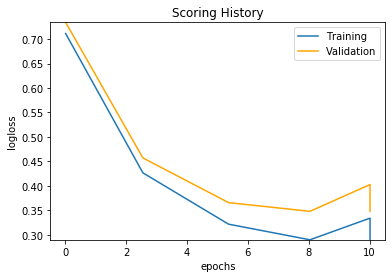

In [9]:
m_def.plot()

Now time for some tuning

In [10]:
m200_epochs =  dle(epochs = 200)

%time m200_epochs.train(xAll,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 3.64 s, sys: 335 ms, total: 3.97 s
Wall time: 19min 8s


In [12]:
m200_epochs.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08143863861548764
RMSE: 0.28537455845868187
LogLoss: 0.25687677819948196
Mean Per-Class Error: 0.1175645639180225
AUC: 0.9592381508934887
AUCPR: 0.6252212753314006
Gini: 0.9184763017869775

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3656292764157204: 


,,NO,YES,Error,Rate
0,NO,1582.0,368.0,0.1887,(368.0/1950.0)
1,YES,171.0,2330.0,0.0684,(171.0/2501.0)
2,Total,1753.0,2698.0,0.1211,(539.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.365629,0.896326,240.0
1,max f2,0.163974,0.934729,311.0
2,max f0point5,0.804652,0.918891,93.0
3,max accuracy,0.456126,0.882723,207.0
4,max precision,0.997119,0.999150,6.0
5,max recall,0.002584,1.000000,395.0
6,max specificity,0.999983,0.999487,0.0
7,max absolute_mcc,0.456126,0.761463,207.0
8,max min_per_class_accuracy,0.522199,0.879487,187.0
9,max mean_per_class_accuracy,0.627162,0.882435,154.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 56.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.023815,1.000000e+00,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.042383,0.042383,77.968812,77.968812
1,,2,0.030106,1.000000e+00,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.011196,0.053579,77.968812,77.968812
2,,3,0.040216,1.000000e+00,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.071571,77.968812,77.968812
3,,4,0.050101,1.000000e+00,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.089164,77.968812,77.968812
4,,5,0.100202,9.999998e-01,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.089164,0.178329,77.968812,77.968812
5,,6,0.150079,9.999855e-01,1.779688,1.779688,1.000000,0.999996,1.000000,0.999999,0.088764,0.267093,77.968812,77.968812
6,,7,0.200180,9.997514e-01,1.771707,1.777691,0.995516,0.999913,0.998878,0.999977,0.088764,0.355858,77.170746,77.769072
7,,8,0.300157,9.907139e-01,1.759692,1.771696,0.988764,0.997102,0.995509,0.999020,0.175930,0.531787,75.969163,77.169551
8,,9,0.400135,9.039999e-01,1.683705,1.749710,0.946067,0.959284,0.983156,0.989091,0.168333,0.700120,68.370494,74.971022
9,,10,0.500112,6.683951e-01,1.323768,1.664560,0.743820,0.797740,0.935310,0.950838,0.132347,0.832467,32.376802,66.456005


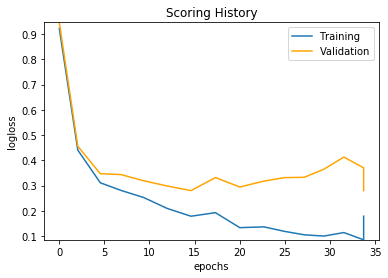

In [13]:
m200_epochs.plot()

Let's add some more hidden layers

In [14]:
m200x200x200 =  dle(epochs = 200, hidden = [200,200,200])

%time m200x200x200.train(xAll,y,train,validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 3.58 s, sys: 224 ms, total: 3.81 s
Wall time: 18min 53s


In [15]:
m200x200x200.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.10004293486589631
RMSE: 0.3162956447153459
LogLoss: 0.31428040910408633
Mean Per-Class Error: 0.1430453459641784
AUC: 0.9390523790483807
AUCPR: 0.7187601551544635
Gini: 0.8781047580967614

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33514753659073154: 


,,NO,YES,Error,Rate
0,NO,1484.0,466.0,0.239,(466.0/1950.0)
1,YES,190.0,2311.0,0.076,(190.0/2501.0)
2,Total,1674.0,2777.0,0.1474,(656.0/4451.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.335148,0.875710,251.0
1,max f2,0.148942,0.918831,318.0
2,max f0point5,0.753956,0.897361,109.0
3,max accuracy,0.515916,0.854864,188.0
4,max precision,0.997149,0.998871,4.0
5,max recall,0.001571,1.000000,396.0
6,max specificity,0.999951,0.999487,0.0
7,max absolute_mcc,0.600496,0.708437,161.0
8,max min_per_class_accuracy,0.500406,0.853259,193.0
9,max mean_per_class_accuracy,0.600496,0.856955,161.0



Gains/Lift Table: Avg response rate: 56.19 %, avg score: 55.20 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010110,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.017993,77.968812,77.968812
1,,2,0.020220,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.035986,77.968812,77.968812
2,,3,0.030106,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017593,0.053579,77.968812,77.968812
3,,4,0.040216,1.000000,1.779688,1.779688,1.000000,1.000000,1.000000,1.000000,0.017993,0.071571,77.968812,77.968812
4,,5,0.050101,0.999999,1.779688,1.779688,1.000000,0.999999,1.000000,1.000000,0.017593,0.089164,77.968812,77.968812
5,,6,0.100202,0.999940,1.779688,1.779688,1.000000,0.999984,1.000000,0.999992,0.089164,0.178329,77.968812,77.968812
6,,7,0.150079,0.999497,1.771672,1.777024,0.995495,0.999783,0.998503,0.999922,0.088365,0.266693,77.167151,77.702392
7,,8,0.200180,0.996553,1.779688,1.777691,1.000000,0.998362,0.998878,0.999532,0.089164,0.355858,77.968812,77.769072
8,,9,0.300157,0.964373,1.711700,1.755710,0.961798,0.984254,0.986527,0.994443,0.171132,0.526989,71.170004,75.571029
9,,10,0.400135,0.824246,1.583722,1.712737,0.889888,0.908691,0.962381,0.973017,0.158337,0.685326,58.372247,71.273748


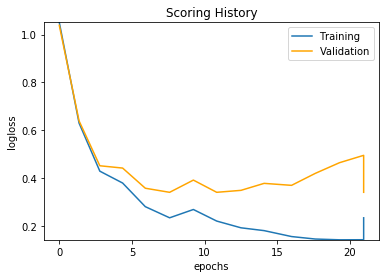

In [16]:
m200x200x200.plot()

In [17]:
m_def.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,202 weights/biases, 9.2 MB, 352,995 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.545897,0.474943,0,0.000117368,0.0255046,-0.350987,0.29514
2,,3,200,Rectifier,0,0,0,0.282704,0.346322,0,-0.0066894,0.0867894,0.0028629,0.294382
3,,4,2,Softmax,,0,0,0.0208816,0.0546994,0,-0.0153557,0.292032,0.0157908,0.19375


In [18]:
m_def.summary()['units']

[3802, 200, 200, 2]

In [19]:
m200_epochs.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,202 weights/biases, 9.2 MB, 1,189,199 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.535656,0.477072,0,0.000136071,0.0272912,-0.349199,0.26403
2,,3,200,Rectifier,0,0,0,0.278738,0.358718,0,-0.0057536,0.0924385,0.0134838,0.314288
3,,4,2,Softmax,,0,0,0.0276139,0.0664297,0,-0.0216277,0.334746,0.0314837,0.223435


In [20]:
m200x200x200.summary()


Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 841,402 weights/biases, 9.7 MB, 738,223 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,3802,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.110743,0.261116,0,-0.000510573,0.0294097,-0.0333043,0.323805
2,,3,200,Rectifier,0,0,0,0.0346159,0.0379311,0,-0.036595,0.0807593,0.805876,0.062571
3,,4,200,Rectifier,0,0,0,0.139068,0.190989,0,-0.00359958,0.0741634,-0.00554899,0.268234
4,,5,2,Softmax,,0,0,0.0242291,0.064025,0,0.00841163,0.306553,0.0267221,0.168898


In [21]:
train.nlevels()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 3501,
 0,
 0,
 0,
 0,
 0,
 132,
 134,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2]

In [22]:
train.structure()

H2OFrame: 'py_3_sid_9c28' 
Dimensions: 35255 obs. of 31 variables
$ Year              :  num 1987 1987 1987 1987 1987 1987 1987 1987 1987 1987
$ Month             :  num 10 10 10 10 10 10 10 10 10 10
$ DayofMonth        :  num 14 15 17 18 22 23 24 25 26 28
$ DayOfWeek         :  num 3 4 6 7 4 5 6 7 1 3
$ DepTime           :  num 741 729 741 729 728 731 744 729 735 741
$ CRSDepTime        :  num 730 730 730 730 730 730 730 730 730 725
$ ArrTime           :  num 912 903 918 847 852 902 908 851 904 919
$ CRSArrTime        :  num 849 849 849 849 849 849 849 849 849 855
$ UniqueCarrier     :  Factor w/ 10 level(s) "AA","CO","DL","HP","PI","PS","TW","UA","US","WN" 
$ FlightNum         :  num 1451 1451 1451 1451 1451 1451 1451 1451 1451 1451
$ TailNum           :  Factor w/ 3501 level(s) "-N912<0xE5>","-N913<0xE5>","-N918<0xE5>","-N919<0xE5>","-N920<0xE5>","-N922<0xE5>","-N923<0xE5>","-N924<0xE5>","-N925<0xE5>","-N926<0xE5>","-N927<0xE5>","-N928<0xE5>","-N934<0xE5>","-N936<0xE5>","-N955<0xE5>

Models without high cardanility column

In [0]:
x2 = list(filter(lambda v : v != 'TailNum', xAll))

deeplearning Model Build progress: |██████████████████████████████████████| 100%


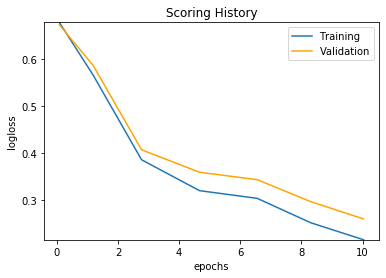

In [24]:
m2_def = dle()
m2_def.train(x2,y,train,validation_frame=valid)
m2_def.plot()

deeplearning Model Build progress: |██████████████████████████████████████| 100%


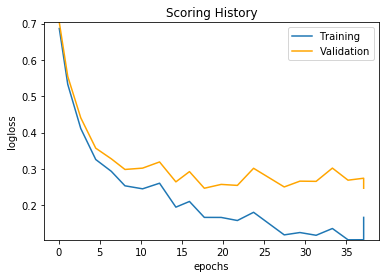

In [25]:
m2_200 = dle(epochs=200)
m2_200.train(x2,y,train,validation_frame=valid)
m2_200.plot()

In [26]:
m2_200x200x200 = dle()
m2_200x200x200.train(x2,y,train,validation_frame=valid)
#m2_m2_200x200x200de.plot()

deeplearning Model Build progress: |██████████████████████████████████████| 100%


NameError: ignored

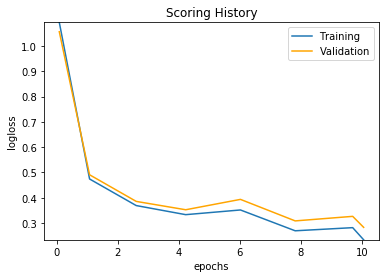

In [28]:
m2_200x200x200.plot()